# Herkunftsländer der Arbeitnehmer

In [202]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from shapely.geometry import Point, Polygon
plt.style.use('../own_style.mplstyle')
from geopandas import GeoDataFrame
import geopandas
import mapclassify
import modules



In [203]:
#cleanup.generate_cleaned_df()


In [204]:

col_list = ["country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)


In [205]:
visas_df = visas_df["country_of_citizenship"].value_counts()[:25]

In [206]:
visas_df.head(25)

INDIA                                                         205158
CHINA                                                          28861
KOREA (THE REPUBLIC OF)                                        24761
CANADA                                                         14804
MEXICO                                                          8961
PHILIPPINES (THE)                                               8631
UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)      4972
TAIWAN (PROVINCE OF CHINA)                                      4173
PAKISTAN                                                        3962
FRANCE                                                          3173
NEPAL                                                           3047
JAPAN                                                           2970
BRAZIL                                                          2919
VENEZUELA (BOLIVARIAN REPUBLIC OF)                              2738
TURKEY                            

In [207]:
web_table = pd.read_html('https://www.iban.com/country-codes', match='Country', keep_default_na=False)
states_abbreviations_df = web_table[0]

In [208]:

states_abbreviations_df 

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16
...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876
245,Western Sahara,EH,ESH,732
246,Yemen,YE,YEM,887
247,Zambia,ZM,ZMB,894


In [209]:

states_abbreviations_df["Country"] = states_abbreviations_df["Country"].str.upper()

In [210]:
states_abbreviations_df


,Country,Alpha-2 code,Alpha-3 code,Numeric
0,AFGHANISTAN,AF,AFG,4
1,ÅLAND ISLANDS,AX,ALA,248
2,ALBANIA,AL,ALB,8
3,ALGERIA,DZ,DZA,12
4,AMERICAN SAMOA,AS,ASM,16
...,...,...,...,...
244,WALLIS AND FUTUNA,WF,WLF,876
245,WESTERN SAHARA,EH,ESH,732
246,YEMEN,YE,YEM,887
247,ZAMBIA,ZM,ZMB,894


In [211]:

visas_df = visas_df.to_frame()

In [212]:
visas_df.reset_index(level=0, inplace=True)


In [213]:
visas_df


,index,country_of_citizenship
0,INDIA,205158
1,CHINA,28861
2,KOREA (THE REPUBLIC OF),24761
3,CANADA,14804
4,MEXICO,8961
5,PHILIPPINES (THE),8631
6,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,4972
7,TAIWAN (PROVINCE OF CHINA),4173
8,PAKISTAN,3962
9,FRANCE,3173


In [214]:
visas_df = visas_df.merge(states_abbreviations_df, left_on='index', right_on="Country")

In [215]:
visas_df.head(50)

,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,KOREA (THE REPUBLIC OF),24761,KOREA (THE REPUBLIC OF),KR,KOR,410
3,CANADA,14804,CANADA,CA,CAN,124
4,MEXICO,8961,MEXICO,MX,MEX,484
5,PHILIPPINES (THE),8631,PHILIPPINES (THE),PH,PHL,608
6,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,4972,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,GB,GBR,826
7,TAIWAN (PROVINCE OF CHINA),4173,TAIWAN (PROVINCE OF CHINA),TW,TWN,158
8,PAKISTAN,3962,PAKISTAN,PK,PAK,586
9,FRANCE,3173,FRANCE,FR,FRA,250


In [216]:
#web_table2 = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv', match='country', keep_default_na=False)

In [217]:
#web_table2 = web_table2[0]

In [218]:

#web_table2

In [219]:
#visas_df = visas_df.merge(web_table2, left_on='Code', right_on="country")

In [220]:
visas_df

,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,KOREA (THE REPUBLIC OF),24761,KOREA (THE REPUBLIC OF),KR,KOR,410
3,CANADA,14804,CANADA,CA,CAN,124
4,MEXICO,8961,MEXICO,MX,MEX,484
5,PHILIPPINES (THE),8631,PHILIPPINES (THE),PH,PHL,608
6,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,4972,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,GB,GBR,826
7,TAIWAN (PROVINCE OF CHINA),4173,TAIWAN (PROVINCE OF CHINA),TW,TWN,158
8,PAKISTAN,3962,PAKISTAN,PK,PAK,586
9,FRANCE,3173,FRANCE,FR,FRA,250


In [221]:
#visas_df["latitude"] = visas_df["latitude"].astype("float")
#visas_df["longitude"] = visas_df["longitude"].astype("float")

In [222]:
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.scatter(visas_df["latitude"], visas_df["longitude"])
#ax.axis('equal')
#plt.show()

In [223]:

#visas_df["country_of_citizenship"] = visas_df["country_of_citizenship"].astype(("float"))

In [224]:
visas_df = GeoDataFrame(visas_df)

In [225]:
visas_df


,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,KOREA (THE REPUBLIC OF),24761,KOREA (THE REPUBLIC OF),KR,KOR,410
3,CANADA,14804,CANADA,CA,CAN,124
4,MEXICO,8961,MEXICO,MX,MEX,484
5,PHILIPPINES (THE),8631,PHILIPPINES (THE),PH,PHL,608
6,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,4972,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,GB,GBR,826
7,TAIWAN (PROVINCE OF CHINA),4173,TAIWAN (PROVINCE OF CHINA),TW,TWN,158
8,PAKISTAN,3962,PAKISTAN,PK,PAK,586
9,FRANCE,3173,FRANCE,FR,FRA,250


In [226]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [227]:
modules.print_full(world)

        pop_est                continent                      name iso_a3  \
0        920938                  Oceania                      Fiji    FJI   
1      53950935                   Africa                  Tanzania    TZA   
2        603253                   Africa                 W. Sahara    ESH   
3      35623680            North America                    Canada    CAN   
4     326625791            North America  United States of America    USA   
5      18556698                     Asia                Kazakhstan    KAZ   
6      29748859                     Asia                Uzbekistan    UZB   
7       6909701                  Oceania          Papua New Guinea    PNG   
8     260580739                     Asia                 Indonesia    IDN   
9      44293293            South America                 Argentina    ARG   
10     17789267            South America                     Chile    CHL   
11     83301151                   Africa           Dem. Rep. Congo    COD   

In [228]:
world.iloc[43, world.columns.get_loc('iso_a3')] = "FRA"

In [229]:
modules.print_full(world)

        pop_est                continent                      name iso_a3  \
0        920938                  Oceania                      Fiji    FJI   
1      53950935                   Africa                  Tanzania    TZA   
2        603253                   Africa                 W. Sahara    ESH   
3      35623680            North America                    Canada    CAN   
4     326625791            North America  United States of America    USA   
5      18556698                     Asia                Kazakhstan    KAZ   
6      29748859                     Asia                Uzbekistan    UZB   
7       6909701                  Oceania          Papua New Guinea    PNG   
8     260580739                     Asia                 Indonesia    IDN   
9      44293293            South America                 Argentina    ARG   
10     17789267            South America                     Chile    CHL   
11     83301151                   Africa           Dem. Rep. Congo    COD   

In [230]:
visas_df=pd.merge(world,visas_df,left_on='iso_a3', right_on='Alpha-3 code')

In [231]:
visas_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0...",CANADA,14804,CANADA,CA,CAN,124
1,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",RUSSIAN FEDERATION (THE),2524,RUSSIAN FEDERATION (THE),RU,RUS,643
2,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1...",MEXICO,8961,MEXICO,MX,MEX,484
3,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5...",BRAZIL,2919,BRAZIL,BR,BRA,76
4,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.876 1.253, -67.065 1.130, -67.26...",COLOMBIA,1843,COLOMBIA,CO,COL,170
5,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-60.734 5.200, -60.601 4.918, -60.96...",VENEZUELA (BOLIVARIAN REPUBLIC OF),2738,VENEZUELA (BOLIVARIAN REPUBLIC OF),VE,VEN,862
6,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",FRANCE,3173,FRANCE,FR,FRA,250
7,8299706,Asia,Israel,ISR,297000.0,"POLYGON ((35.720 32.709, 35.546 32.394, 35.184...",ISRAEL,1914,ISRAEL,IL,ISR,376
8,96160163,Asia,Vietnam,VNM,594900.0,"POLYGON ((104.334 10.487, 105.200 10.889, 106....",VIET NAM,2290,VIET NAM,VN,VNM,704
9,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.175 37.750, 126.237 37.840, 126....",KOREA (THE REPUBLIC OF),24761,KOREA (THE REPUBLIC OF),KR,KOR,410


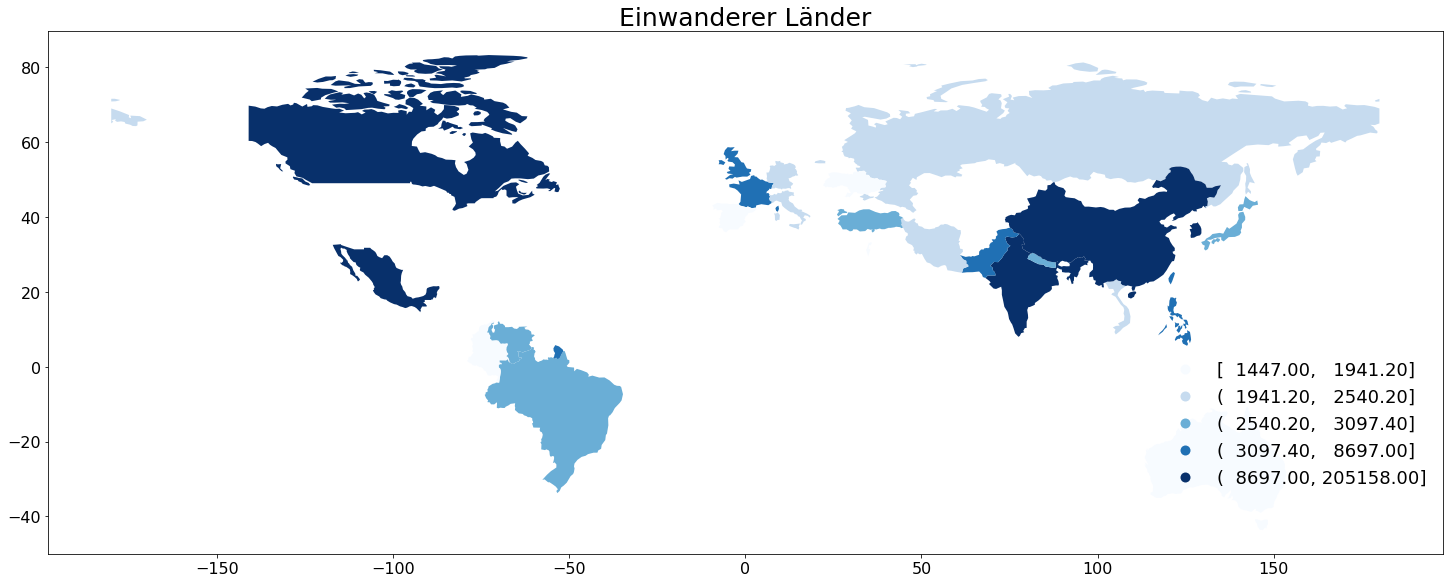

In [264]:
# plot confirmed cases world map
visas_df.plot(column='country_of_citizenship', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Blues',legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.0, .4),
                            fontsize=18,
                            
                            frameon=False))

plt.title('Einwanderer Länder',fontsize=25)


# add countries names and numbers
#for i in range(0,10):
#    plt.text(float(visas_df.longitude[i]),float(visas_df.latitude[i]),"{}\n{}".format(visas_df.index[i],visas_df.country_of_citizenship[i]),size=10)

plt.show()

In [233]:
#https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b